# Visão Computacional e Deep Learning

## Classificação de imagens utilizand Transfer Learning

### Kaggle Dataset Competition: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview

![dogs-cat](imagens/dogs-cats.png "dogs-cats")

### Verificando a base de dados

In [8]:
import os, random

In [9]:
print(os.listdir('datasets'))

['test', 'train']


In [16]:
print(os.listdir('datasets/train')[:400])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

- Diretórios de imagens

In [17]:
train_dir = 'datasets/train'
test_dir = 'datasets/test'

- listas com as imagens de treino e teste

In [155]:
train_imgs = ['datasets/train/{}'.format(i) for i in os.listdir(train_dir)]
test_imgs = ['datasets/test/{}'.format(i) for i in os.listdir(test_dir)]

In [21]:
print('Quantidade de imagens de treino: {train} e teste: {test}'.format(train=len(train_imgs),test=len(test_imgs)))

Quantidade de imagens de treino: 400 e teste: 100


- Aleatorizando as imagens de treino

In [22]:
random.shuffle(train_imgs)

In [23]:
print(train_imgs[:20])

['datasets/train/cat.129.jpg', 'datasets/train/cat.135.jpg', 'datasets/train/cat.151.jpg', 'datasets/train/dog.140.jpg', 'datasets/train/cat.178.jpg', 'datasets/train/dog.175.jpg', 'datasets/train/cat.19.jpg', 'datasets/train/dog.151.jpg', 'datasets/train/dog.177.jpg', 'datasets/train/cat.54.jpg', 'datasets/train/dog.102.jpg', 'datasets/train/cat.55.jpg', 'datasets/train/dog.170.jpg', 'datasets/train/cat.169.jpg', 'datasets/train/dog.55.jpg', 'datasets/train/cat.143.jpg', 'datasets/train/dog.63.jpg', 'datasets/train/dog.29.jpg', 'datasets/train/dog.19.jpg', 'datasets/train/cat.105.jpg']


- Importando as bibliotecas necessárias

In [26]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

- Definindo as dimensões das imagens de entrada

In [25]:
nrows = 150
ncolumns = 150
channels = 3

### função para processamento das imagens e classes

- efetuando o resize nas imagens e definindo os valores inteiros para as classes

In [59]:
def read_and_process_image(list_of_images):
    x = []
    y = []
    
    for image in list_of_images:
        image_ = Image.open(image)
        x.append(np.asarray(image_.resize((nrows,ncolumns))))
        
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    return x, y

In [60]:
x,y = read_and_process_image(train_imgs)

- transformando a lista de imagens em classes em array

In [63]:
x = np.array(x)
y = np.array(y)

- Visualizando algumas imagens

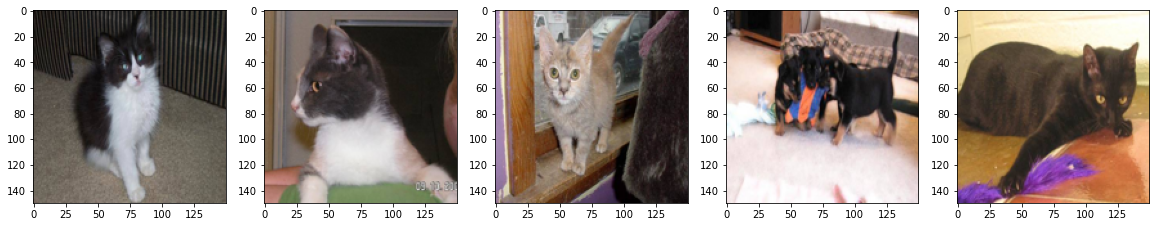

In [102]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.imshow(x[i])

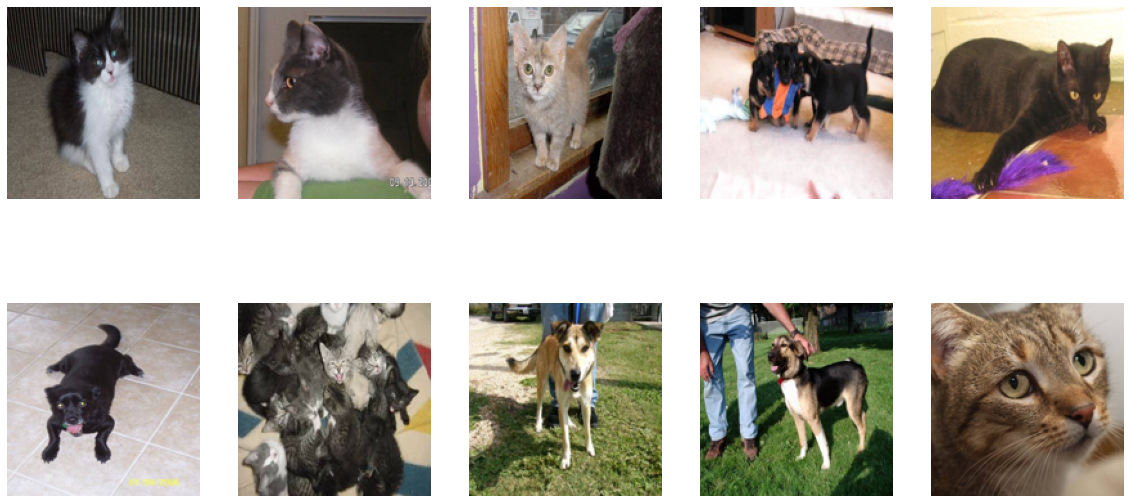

In [72]:
fig, axs = plt.subplots(5 // columns + 1, columns, figsize=(20, 10))
for i, ax in enumerate(axs.flatten()):
    if i < len(x):
        ax.imshow(x[i])
    ax.axis('off')
plt.show()

- Separando as imagens dos dados em treino e teste

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

### Criando o nosso modelo

- instalando as bilbiotecas keras e tensorflow

In [105]:
!pip install keras

In [106]:
!pip install tensorflow

  Using cached importlib_metadata-6.0.0-py3-none-any.whl (21 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


- importando o modelo pre-treinado ImageNet

In [109]:
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights = 'imagenet', include_top=False, input_shape=(150,150,3))

219055592/219055592 [==============================] - 13s 0us/step


- Verificando a arquitetura da rede

In [110]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                

- Importando a biblioteca keras para criar a rede

In [111]:
from keras import layers, models

- criando o modelo utilizando a rede convolucional como base

In [113]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Verificando novamente a arquitetura da rede

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 3, 3, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 256)               3539200   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


#### Verificando o número de pesos a ajustar sem utilizar a rede pré-treinada e após

In [115]:
print('Número de pesos ajustáveis sem utilizar a rede convolucional: ', len(model.trainable_weights))
conv_base.trainable = False
print('Número de pesos ajustáveis utilizando a rede convolucional: ', len(model.trainable_weights))

Número de pesos ajustáveis sem utilizar a rede convolucional:  492
Número de pesos ajustáveis utilizando a rede convolucional:  4


#### Criação dos conjuntos de dados de treino e teste utilizando Data Augmentation para prevenir overfitting

In [123]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

ntrain = len(x_train)
nval = len(x_test)
batch_size = 32

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_test, y_test, batch_size=batch_size)

#### Criando um modelo binário para treinar as nossas imagens

In [128]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size
                              )

C:\Users\marcf\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-128-282d733cf0f5>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
10/10 [==============================] - 29s 2s/step - loss: 0.4895 - acc: 0.7906 - val_loss: 0.1400 - val_acc: 0.9219
Epoch 2/20
10/10 [==============================] - 13s 1s/step - loss: 0.2133 - acc: 0.9156 - val_loss: 0.1370 - val_acc: 0.9062
Epoch 3/20
10/10 [==============================] - 15s 1s/step - loss: 0.1861 - acc: 0.9125 - val_loss: 0.1320 - val_acc: 0.9375
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.1480 - acc: 0.9500 - val_loss: 0.0750 - val_acc: 0.9375
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 0.1978 - acc: 0.9187 - val_loss: 0.1308 - val_acc: 0.9531
Epoch 6/20
10/10 [==============================] - 15s 1s/step - loss: 0.1009 - acc: 0.9531 - val_loss: 0.1957 - val_acc: 0.9375
Epoch 7/20
10/10 [==============================] - 15s 1s/step - loss: 0.1031 - acc: 0.9563 - val_loss: 0.1199 - val_acc: 0.9531
Epoch 8/20
10/10 [==============================] - 14s 1s/step - loss: 0.1300 - acc: 0.94

- Salvando o modelo e pesos em disco

In [129]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

- salvando o arquivo de histórico em disco

In [130]:
import pickle

In [131]:
f = open('history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

- Carregando o modelo a partir do disco

In [132]:
from keras.models import load_model

In [133]:
import pickle

In [134]:
model = load_model('model_keras.h5')

- Carregando o arquivo de histórico a partir do disco

In [137]:
f = open('historY.pckl', 'rb')
historico = pickle.load(f)
f.close()

- Visualizando as métricas do modelo

In [138]:
import matplotlib.pyplot as plt

acc = historico['acc']
val_acc = historico['val_acc']
loss = historico['loss']
val_loss = historico['val_loss']
epochs = range(1, len(acc) + 1)

- Acurácia de treino e teste

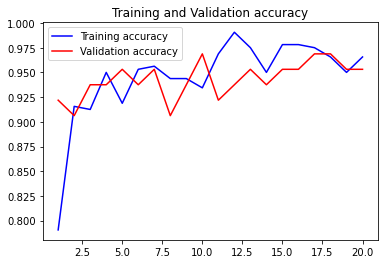

In [140]:
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

#### Função de perda de treino e teste

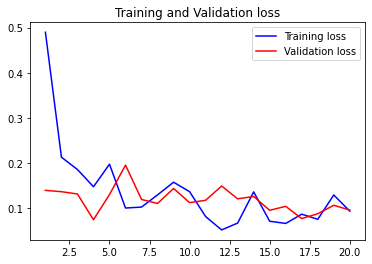

In [141]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

##### Função para suavizar os dados e melhorar a visualização

In [143]:
def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1-factor))
        else:
            smooth_pts.append(point)
    return smooth_pts

- Acurácio de treino e teste

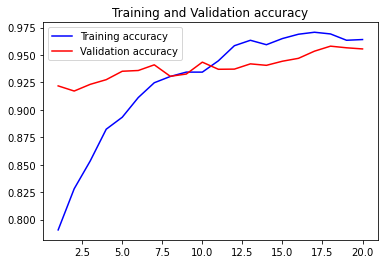

In [146]:
plt.plot(epochs, smooth_plot(acc), 'b', label="Training accuracy")
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

#### Testando os resultados de predição

- Selecionando 10 imagens a partir do conjunto de teste

In [149]:
random.shuffle(test_imgs)

In [156]:
x_test, y_test = read_and_process_image(test_imgs)

- transformando a lista de imagens em array e aplicando a rescala dos pixels

In [151]:
x = np.array(x_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

- Plotando as imagens e suas respectivas classes

1/1 [==============================] - 0s 74ms/step


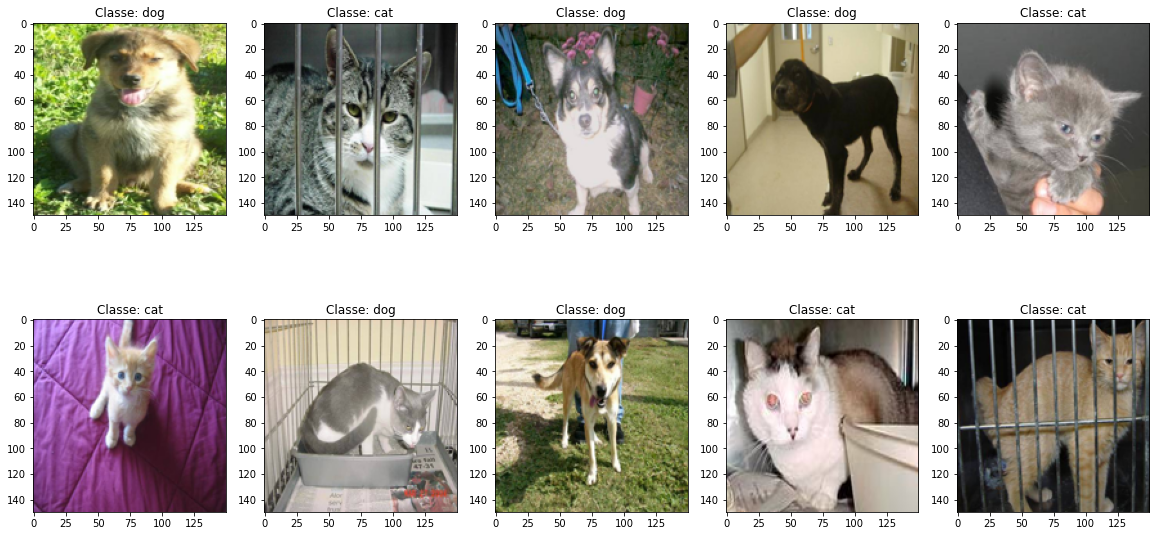

In [165]:
i = 0
columns = 5
text_labels = []

plt.figure(figsize=(20,10))

for batch in test_datagen.flow(x, batch_size=1):
    predict_x = model.predict(batch)
    #pred = np.argmax(predict_x, axis=-1)
    pred=int(np.around(predict_x))
    if pred == 1:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
        
    plt.subplot(5 // columns + 1, columns, i + 1)
    plt.title('Classe: ' + text_labels[i])
    
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()